# Investigating Weber's Law of Psychophysics in Convolutional Neural Networks

## Baseline CNN on MNIST dataset without illumination or contrast adjustments

In [ ]:
import tensorflow
from tensorflow import keras
import numpy as np

num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


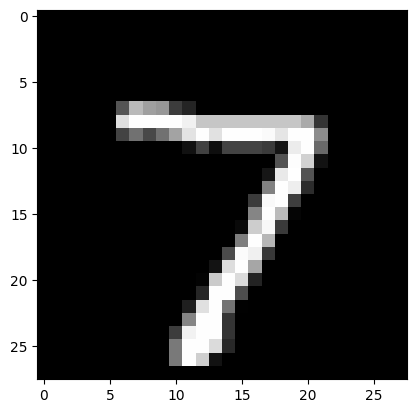

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap='gray')
plt.show()

In [ ]:
# adapted from Keras Simple MNIST convnet https://keras.io/examples/vision/mnist_convnet/
from keras import layers
from keras import Sequential

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

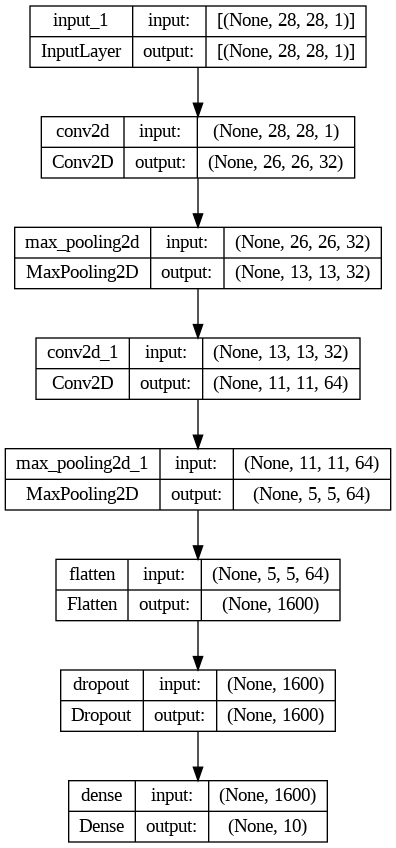

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
from keras.optimizers import Adam

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 58s 131ms/step - loss: 0.3673 - accuracy: 0.8896 - val_loss: 0.0838 - val_accuracy: 0.9780
Epoch 2/15
422/422 [==============================] - 42s 98ms/step - loss: 0.1060 - accuracy: 0.9670 - val_loss: 0.0627 - val_accuracy: 0.9828
Epoch 3/15
422/422 [==============================] - 42s 101ms/step - loss: 0.0802 - accuracy: 0.9754 - val_loss: 0.0450 - val_accuracy: 0.9878
Epoch 4/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0687 - accuracy: 0.9801 - val_loss: 0.0494 - val_accuracy: 0.9857
Epoch 5/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0603 - accuracy: 0.9813 - val_loss: 0.0415 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0547 - accuracy: 0.9834 - val_loss: 0.0368 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 43s 103ms/step - loss: 0.0516 - accuracy: 0.9842 - val_loss: 0.0353 - val_acc

In [ ]:
y_pred = model.predict(x_test)
y_pred_label = y_pred.argmax(-1)
y_true = y_test.argmax(-1)

313/313 [==============================] - 4s 11ms/step


In [ ]:
import sklearn as sk
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_label))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
from sklearn.metrics import accuracy_score
accuracies = []
accuracies.append(accuracy_score(y_true, y_pred_label))
print(accuracies[0])

0.9908


## Increasing Luminance of the Images

Increasing luminance factor by 2

In [ ]:
luminance_factor = 2
x_test_2 = np.clip(x_test * luminance_factor, 0, 1)

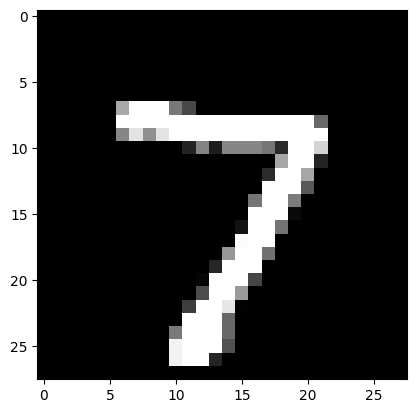

In [ ]:
plt.imshow(x_test_2[0], cmap='gray')
plt.show()

In [ ]:
y_pred_2 = model.predict(x_test_2)
y_pred_2_label = y_pred_2.argmax(-1)

313/313 [==============================] - 3s 10ms/step


In [ ]:
accuracies.append(accuracy_score(y_true, y_pred_2_label))
print(accuracies[1])

0.9901


Increasing luminance factor by 3

In [ ]:
luminance_factor = 3
x_test_3 = np.clip(x_test * luminance_factor, 0, 1)

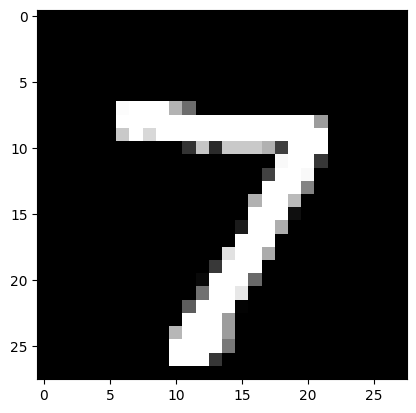

In [ ]:
plt.imshow(x_test_3[0], cmap='gray')
plt.show()

In [ ]:
y_pred_3 = model.predict(x_test_3)
y_pred_3_label = y_pred_3.argmax(-1)

313/313 [==============================] - 3s 10ms/step


In [ ]:
accuracies.append(accuracy_score(y_true, y_pred_3_label))
print(accuracies[2])

0.9889


Increasing luminance factor by 4

In [ ]:
luminance_factor = 4
x_test_4 = np.clip(x_test * luminance_factor, 0, 1)

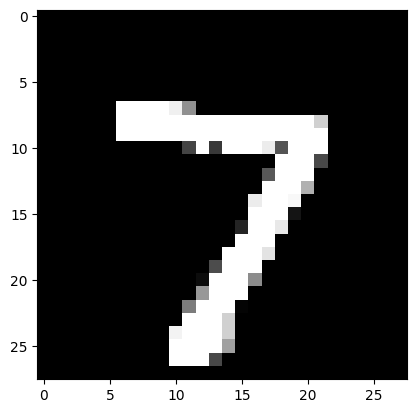

In [ ]:
plt.imshow(x_test_4[0], cmap='gray')
plt.show()

In [ ]:
y_pred_4 = model.predict(x_test_4)
y_pred_4_label = y_pred_4.argmax(-1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
accuracies.append(accuracy_score(y_true, y_pred_4_label))
print(accuracies[3])

0.9881


Increasing luminance by factor of 5

In [ ]:
luminance_factor = 5
x_test_5 = np.clip(x_test * luminance_factor, 0, 1)

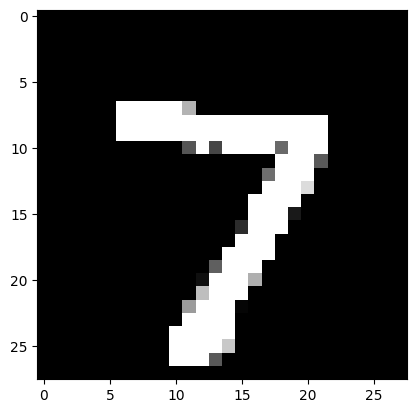

In [ ]:
plt.imshow(x_test_5[0], cmap='gray')
plt.show()

In [ ]:
y_pred_5 = model.predict(x_test_5)
y_pred_5_label = y_pred_5.argmax(-1)

313/313 [==============================] - 2s 8ms/step


In [ ]:
accuracies.append(accuracy_score(y_true, y_pred_5_label))
print(accuracies[4])

0.9877


Increasing luminance by 10

In [ ]:
luminance_factor = 10
x_test_6 = np.clip(x_test * luminance_factor, 0, 1)

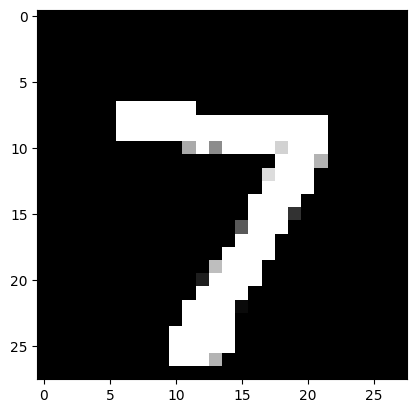

In [ ]:
plt.imshow(x_test_6[0], cmap='gray')
plt.show()

In [ ]:
y_pred_6 = model.predict(x_test_6)
y_pred_6_label = y_pred_6.argmax(-1)

313/313 [==============================] - 2s 8ms/step


In [ ]:
accuracies.append(accuracy_score(y_true, y_pred_6_label))
print(accuracies[5])

0.9865


Increasing luminance by 100

In [ ]:
luminance_factor = 100
x_test_7 = np.clip(x_test * luminance_factor, 0, 1)

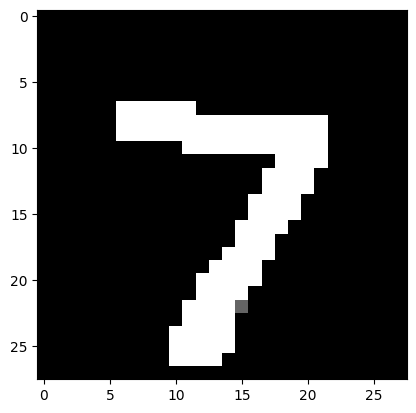

In [ ]:
plt.imshow(x_test_7[0], cmap='gray')
plt.show()

In [ ]:
y_pred_7 = model.predict(x_test_7)
y_pred_7_label = y_pred_7.argmax(-1)

313/313 [==============================] - 3s 11ms/step


In [ ]:
accuracies.append(accuracy_score(y_true, y_pred_7_label))
print(accuracies[6])

1000

In [ ]:
luminance_factor = 1000
x_test_8 = np.clip(x_test * luminance_factor, 0, 1)

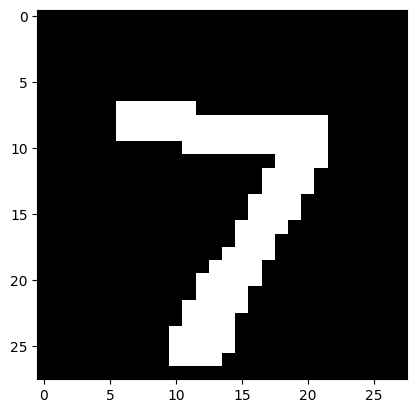

In [ ]:
plt.imshow(x_test_8[0], cmap='gray')
plt.show()

In [ ]:
y_pred_8 = model.predict(x_test_8)
y_pred_8_label = y_pred_8.argmax(-1)

In [ ]:
accuracies.append(accuracy_score(y_true, y_pred_8_label))
print(accuracies[7])

0.9837


0.1

In [ ]:
luminance_factor = 0.1
x_test_9 = np.clip(x_test * luminance_factor, 0, 1)

In [ ]:
plt.imshow(x_test_9[0], cmap='gray')
plt.show()
np.mean(x_test_9)

In [ ]:
y_pred_9 = model.predict(x_test_9)
y_pred_9_label = y_pred_9.argmax(-1)

In [ ]:
np.mean(x_test_9)

0.013251462

In [ ]:
accuracies.insert(0, accuracy_score(y_true, y_pred_9_label))
print(accuracies[0])

# Plots

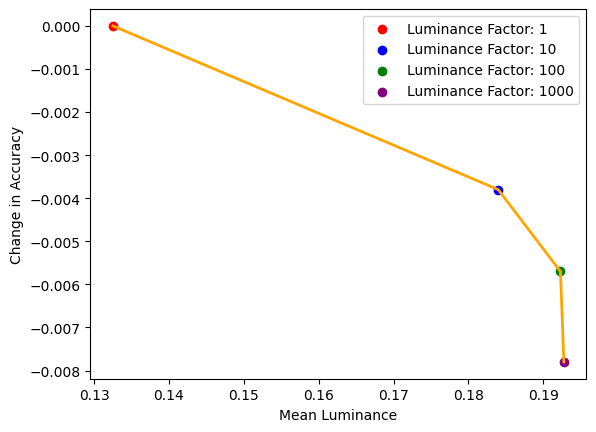

In [ ]:
y = [accuracies[1] - accuracies[1], accuracies[6] - accuracies[1], accuracies[7] - accuracies[1], accuracies[8] - accuracies[1]]
x = [np.mean(x_test), np.mean(x_test_6), np.mean(x_test_7), np.mean(x_test_8)]

fig, ax = plt.subplots()

labels = [1, 10, 100, 1000]
colors = ['red', 'blue', 'green', 'purple']
for i in range(len(y)):
  color = colors[i]
  label = 'Luminance Factor: ' + str(labels[i])
  ax.scatter(x[i], y[i], color=color, label=label)
plt.legend()
ax.plot(x, y, linewidth=2.0, color='orange')
plt.ylabel('Change in Accuracy')
plt.xlabel('Mean Luminance')
plt.show()

In [ ]:
print(accuracies)
print(y)

[0.5728, 0.9922, 0.9909, 0.9891, 0.9887, 0.9884, 0.9865, 0.9844, 0.984]
[0.0, 0.41559999999999997, 0.41370000000000007, 0.4116000000000001]


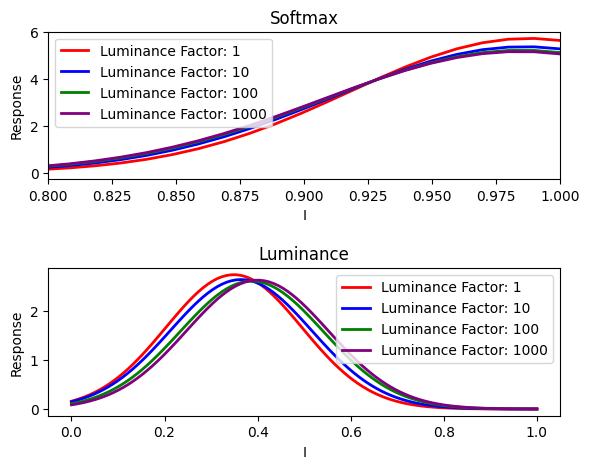

<Figure size 4000x4000 with 0 Axes>

In [ ]:
from scipy.stats import norm

softmax = np.array([y_pred, y_pred_6, y_pred_7, y_pred_8])
luminance = np.array([x_test, x_test_6, x_test_7, x_test_8])

luminance_norm = [[]] * len(luminance)
for i, j in enumerate(luminance):
  for idx, k in enumerate(j):
    luminance_norm[i].append(np.mean(k))
  luminance_norm[i] = (luminance_norm[i] - np.min(luminance_norm[i])) / (np.max(luminance_norm[i]) - np.min(luminance_norm[i]))

softmax_norm = [[]]*len(softmax)
for i, j in enumerate(softmax):
  for idx, k in enumerate(j):
    softmax_norm[i].append(np.amax(k))
  softmax_norm[i] = (softmax_norm[i] - np.min(softmax_norm[i])) / (np.max(softmax_norm[i]) - np.min(softmax_norm[i]))

all_x = np.concatenate(luminance_norm)
all_y = np.concatenate(softmax_norm)
xmin, xmax = np.amin(all_x), np.amax(all_x)
ymin, ymax = np.amin(all_y), np.amax(all_y)

x_lin = np.linspace(xmin, xmax, 100)
y_lin = np.linspace(ymin, ymax, 100)

fig, (ax1, ax2) = plt.subplots(2, 1)
labels = [1, 10, 100, 1000]
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(len(softmax)):
  mu_y, std_y = norm.fit(softmax_norm[i])

  color = colors[i]
  label = 'Luminance Factor: '+ str(labels[i])
  # Plotting the Gaussian fit
  q = norm.pdf(y, mu_y, std_y)

  ax1.plot(y_lin, norm.pdf(y_lin, mu_y, std_y), color=color, linewidth=2, label=label)

ax1.set_title('Softmax')
ax1.set_xlim(0.8, 1)
ax1.set_xlabel('I')
ax1.set_ylabel('Response')
ax1.legend()

for i in range(len(luminance)):
  mu_x, std_x = norm.fit(luminance_norm[i])


  color = colors[i]
  label = 'Luminance Factor: '+ str(labels[i])
  # Plotting the Gaussian fit
  p = norm.pdf(x, mu_x, std_x)

  ax2.plot(x_lin, norm.pdf(x_lin, mu_x, std_x), color=color, linewidth=2, label=label)



ax2.set_title("Luminance")
ax2.set_xlabel('I')
ax2.set_ylabel('Response')
ax2.legend()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)
plt.figure(figsize=(40, 40))
plt.show()

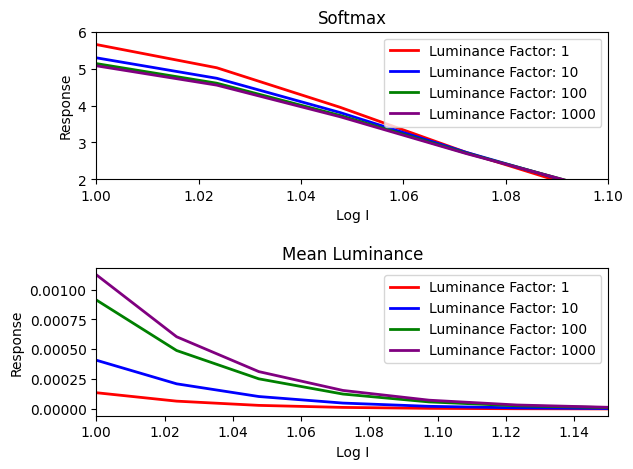

<Figure size 4000x4000 with 0 Axes>

In [ ]:
softmax = np.array([y_pred, y_pred_6, y_pred_7, y_pred_8])
luminance = np.array([x_test, x_test_6, x_test_7, x_test_8])

luminance_norm = [[]] * len(luminance)
for i, j in enumerate(luminance):
  for idx, k in enumerate(j):
    luminance_norm[i].append(np.mean(k))
  luminance_norm[i] = (luminance_norm[i] - np.min(luminance_norm[i])) / (np.max(luminance_norm[i]) - np.min(luminance_norm[i]))

softmax_norm = [[]]*len(softmax)
for i, j in enumerate(softmax):
  for idx, k in enumerate(j):
    softmax_norm[i].append(np.amax(k))
  softmax_norm[i] = (softmax_norm[i] - np.min(softmax_norm[i])) / (np.max(softmax_norm[i]) - np.min(softmax_norm[i]))

all_x = np.concatenate(luminance_norm)
all_y = np.concatenate(softmax_norm)
xmin, xmax = np.amin(all_x), np.amax(all_x)
ymin, ymax = np.amin(all_y), np.amax(all_y)

x_lin = np.logspace(xmin, xmax, 100)
y_lin = np.logspace(ymin, ymax, 100)

fig, (ax1, ax2) = plt.subplots(2, 1)
labels = [1, 10, 100, 1000]
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(len(softmax)):
  mu_y, std_y = norm.fit(softmax_norm[i])

  color = colors[i]
  label = 'Luminance Factor: '+ str(labels[i])
  # Plotting the Gaussian fit
  q = norm.pdf(y, mu_y, std_y)

  ax1.plot(y_lin, norm.pdf(y_lin, mu_y, std_y), color=color, linewidth=2, label=label)

ax1.set_title('Softmax')
ax1.set_xlim(1, 1.1)
ax1.set_ylim(2, 6)
ax1.set_xlabel('Log I')
ax1.set_ylabel('Response')
ax1.legend()

for i in range(len(luminance)):
  mu_x, std_x = norm.fit(luminance_norm[i])


  color = colors[i]
  label = 'Luminance Factor: '+ str(labels[i])
  # Plotting the Gaussian fit
  p = norm.pdf(x, mu_x, std_x)

  ax2.plot(x_lin, norm.pdf(x_lin, mu_x, std_x), color=color, linewidth=2, label=label)


ax2.set_xlim(1, 1.15)
ax2.set_title("Mean Luminance")
ax2.set_xlabel('Log I')
ax2.set_ylabel('Response')
ax2.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)
plt.figure(figsize=(40, 40))

plt.show()